In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [12]:
# Create two arrays of random latitude and longitude combinations.
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# zipping them
#lat_lngs = zip(lats, lngs)
#lat_lngs

In [13]:
# Add the latitudes and longitudes to a list from the zipped tuple in API_practice notebook
#coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities.
#cities = []
# Identify the nearest city for each latitude and longitude combination.
#for coordinate in coordinates:
#    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

#    # If the city is unique, then we will add it to the cities list.
#    if city not in cities:
#        cities.append(city)
# Print the city count to confirm sufficient count.
#len(cities)

In [15]:
# build the basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11116ce730e845dd0e9ed1c092fa071b


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve 
#  both the index, and the city from the list.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #   we are removing the blank spaces in 
    #   the city name and concatenating the city name with '+'
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list with a dictionary for that city.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as ex:
        print(ex)
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 37 of Set 13 | wahiawa
Processing Record 38 of Set 13 | nome
Processing Record 39 of Set 13 | cayenne
Processing Record 40 of Set 13 | andenes
Processing Record 41 of Set 13 | dauphin
Processing Record 42 of Set 13 | kavaratti
Processing Record 43 of Set 13 | raudeberg
Processing Record 44 of Set 13 | pevek
Processing Record 45 of Set 13 | illoqqortoormiut
'coord'
City not found. Skipping...
Processing Record 46 of Set 13 | asau
Processing Record 47 of Set 13 | finschhafen
Processing Record 48 of Set 13 | bethel
Processing Record 49 of Set 13 | busselton
Processing Record 50 of Set 13 | lithakia
Processing Record 51 of Set 13 | campbell river
Processing Record 52 of Set 13 | hobart
Processing Record 53 of Set 13 | hami
Processing Record 54 of Set 13 | kahului
Processing Record 55 of Set 13 | sinnamary
Processing Record 56 of Set 13 | barentsburg
'coord'
City not found. Skipping...
Processing Record 57 of Set 13 | deputatskiy
Processing Record 58 of Set 13 | punta aren

Processing Record 32 of Set 16 | ayan
Processing Record 33 of Set 16 | terekli-mekteb
Processing Record 34 of Set 16 | wasilla
Processing Record 35 of Set 16 | valparaiso
Processing Record 36 of Set 16 | tsihombe
'coord'
City not found. Skipping...
Processing Record 37 of Set 16 | vostok
Processing Record 38 of Set 16 | porto novo
Processing Record 39 of Set 16 | maceio
Processing Record 40 of Set 16 | marcona
'coord'
City not found. Skipping...
Processing Record 41 of Set 16 | arona
Processing Record 42 of Set 16 | barranca
Processing Record 43 of Set 16 | khatanga
Processing Record 44 of Set 16 | san quintin
Processing Record 45 of Set 16 | chokurdakh
Processing Record 46 of Set 16 | biloela
Processing Record 47 of Set 16 | baisha
Processing Record 48 of Set 16 | ventanas
Processing Record 49 of Set 16 | sur
Processing Record 50 of Set 16 | hasaki
Processing Record 1 of Set 17 | pucallpa
Processing Record 2 of Set 17 | exeter
Processing Record 3 of Set 17 | kondinskoye
Processing Rec

Processing Record 17 of Set 20 | inirida
Processing Record 18 of Set 20 | giresun
Processing Record 19 of Set 20 | sirjan
Processing Record 20 of Set 20 | ancud
Processing Record 21 of Set 20 | lavrentiya
Processing Record 22 of Set 20 | les cayes
Processing Record 23 of Set 20 | neryungri
Processing Record 24 of Set 20 | evensk
Processing Record 25 of Set 20 | mentok
'coord'
City not found. Skipping...
Processing Record 26 of Set 20 | camana
Processing Record 27 of Set 20 | vestbygda
'coord'
City not found. Skipping...
Processing Record 28 of Set 20 | caravelas
Processing Record 29 of Set 20 | birao
Processing Record 30 of Set 20 | severo-kurilsk
Processing Record 31 of Set 20 | luganville
Processing Record 32 of Set 20 | bereda
Processing Record 33 of Set 20 | spornoye
Processing Record 34 of Set 20 | pokrovsk-uralskiy
'coord'
City not found. Skipping...
Processing Record 35 of Set 20 | atasu
Processing Record 36 of Set 20 | vershino-darasunskiy
Processing Record 37 of Set 20 | peman

Processing Record 50 of Set 23 | yenagoa
Processing Record 1 of Set 24 | alice springs
Processing Record 2 of Set 24 | harbour breton
Processing Record 3 of Set 24 | saint-augustin
Processing Record 4 of Set 24 | lamar
Processing Record 5 of Set 24 | mareeba
Processing Record 6 of Set 24 | ashtian
Processing Record 7 of Set 24 | binzhou
Processing Record 8 of Set 24 | elk city
Processing Record 9 of Set 24 | matagami
Processing Record 10 of Set 24 | manokwari
Processing Record 11 of Set 24 | tottori
Processing Record 12 of Set 24 | vikarabad
Processing Record 13 of Set 24 | gbadolite
Processing Record 14 of Set 24 | diadema
Processing Record 15 of Set 24 | shaoyang
Processing Record 16 of Set 24 | tecoanapa
Processing Record 17 of Set 24 | coruripe
Processing Record 18 of Set 24 | mukhen
Processing Record 19 of Set 24 | bilibino
Processing Record 20 of Set 24 | mount gambier
Processing Record 21 of Set 24 | gamba
Processing Record 22 of Set 24 | haines junction
Processing Record 23 of 

In [20]:
len(city_data)

588

In [21]:
# convert the list of dictionaries to a DataFrame
# confirm they are in the correct order
# export the DataFrame as a csv file
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wahiawa,21.50,-158.02,86.00,74,20,12.75,US,2020-11-04 02:39:29
1,Nome,64.50,-165.41,26.60,73,90,18.34,US,2020-11-04 02:39:29
2,Cayenne,4.93,-52.33,80.60,88,75,3.36,GF,2020-11-04 02:39:29
3,Andenes,69.31,16.12,42.80,81,97,25.28,NO,2020-11-04 02:39:29
4,Dauphin,51.15,-100.05,42.80,74,1,9.17,CA,2020-11-04 02:36:27
5,Kavaratti,10.57,72.64,82.36,72,0,4.56,IN,2020-11-04 02:39:30
6,Raudeberg,61.99,5.14,44.01,87,100,10.29,NO,2020-11-04 02:39:30
7,Pevek,69.70,170.31,-1.44,90,29,9.91,RU,2020-11-04 02:39:30
8,Asau,46.43,26.40,45.00,97,95,1.81,RO,2020-11-04 02:39:30
9,Finschhafen,-6.60,147.87,84.45,68,100,8.50,PG,2020-11-04 02:39:30


In [22]:
# to order the Dataframe correctly
# first create a variable to hold an array with the columns in the correct order
# then we assign the DataFrame (or a new one) with the array
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wahiawa,US,2020-11-04 02:39:29,21.50,-158.02,86.00,74,20,12.75
1,Nome,US,2020-11-04 02:39:29,64.50,-165.41,26.60,73,90,18.34
2,Cayenne,GF,2020-11-04 02:39:29,4.93,-52.33,80.60,88,75,3.36
3,Andenes,NO,2020-11-04 02:39:29,69.31,16.12,42.80,81,97,25.28
4,Dauphin,CA,2020-11-04 02:36:27,51.15,-100.05,42.80,74,1,9.17
5,Kavaratti,IN,2020-11-04 02:39:30,10.57,72.64,82.36,72,0,4.56
6,Raudeberg,NO,2020-11-04 02:39:30,61.99,5.14,44.01,87,100,10.29
7,Pevek,RU,2020-11-04 02:39:30,69.70,170.31,-1.44,90,29,9.91
8,Asau,RO,2020-11-04 02:39:30,46.43,26.40,45.00,97,95,1.81
9,Finschhafen,PG,2020-11-04 02:39:30,-6.60,147.87,84.45,68,100,8.50


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
# If we ever need to export the CSV file to a DataFrame, column A "City_ID" will be present in the DataFrame

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/04/20'

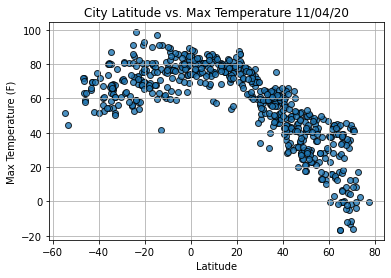

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

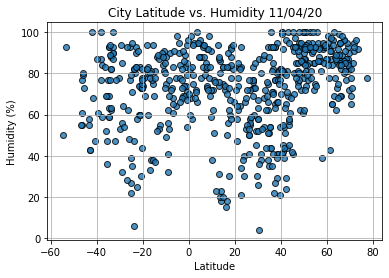

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

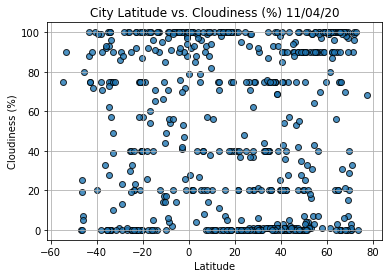

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

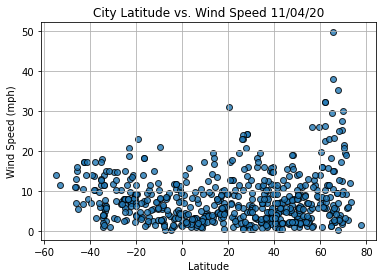

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()